## Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Data Preprocessing

### Training Image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Chat Bot/aicrop/Rice-diseases-Data-Set/Dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1027 files belonging to 3 classes.


### Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Chat Bot/aicrop/Rice-diseases-Data-Set/Dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1027 files belonging to 3 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[178.125     195.49219   206.4336   ]
   [184.07812   199.125     208.03906  ]
   [189.5625    199.9375    206.4961   ]
   ...
   [155.33203   162.5625    156.63281  ]
   [161.92188   170.98438   161.53125  ]
   [166.69531   184.63672   188.71484  ]]

  [[177.27734   188.72656   204.80078  ]
   [178.65234   190.41016   206.15234  ]
   [184.1914    196.125     208.6211   ]
   ...
   [155.74219   168.0625    176.17188  ]
   [149.08203   159.64453   168.60938  ]
   [157.01172   167.3125    176.71094  ]]

  [[186.33203   201.96875   209.92969  ]
   [191.52734   205.4961    211.94531  ]
   [189.2461    204.08984   207.3711   ]
   ...
   [163.45312   173.65625   162.89062  ]
   [165.02344   173.08203   166.25     ]
   [167.04688   181.53125   183.44531  ]]

  ...

  [[150.78516   154.13672   156.32031  ]
   [152.27734   154.98438   154.40625  ]
   [148.0039    148.1836    160.7539   ]
   ...
   [118.50391   130.26172   144.21484  ]
   [118.42969   127.5625    142.4414   ]
   [1

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)), #define the input shape here.
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    # ... rest of your layers
])

In [ ]:
## Building Convolution Layer

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
#model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500,activation='relu'))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
#Output Layer
model.add(Dense(units=3,activation='softmax'))

### Compiling Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 124, 124, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      55,297,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           4,503 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,483,507 (215.47 MB)

 Trainable params: 56,483,507 (215.47 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [ ]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 198s 6s/step - accuracy: 0.6061 - loss: 3.6511 - val_accuracy: 0.7848 - val_loss: 0.4414
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.8080 - loss: 0.4445 - val_accuracy: 0.8783 - val_loss: 0.2821
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 329ms/step - accuracy: 0.8992 - loss: 0.2836 - val_accuracy: 0.9727 - val_loss: 0.1574
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 447ms/step - accuracy: 0.8747 - loss: 0.3132 - val_accuracy: 0.9796 - val_loss: 0.1111
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 447ms/step - accuracy: 0.9706 - loss: 0.1203 - val_accuracy: 0.9825 - val_loss: 0.0882
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - accuracy: 0.9524 - loss: 0.1261 - val_accuracy: 0.9455 - val_loss: 0.1692
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - accuracy: 0.9527 - loss: 0.1158 - val_accuracy: 0.9932 - val_loss: 0.0307
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 0.9906 - loss: 0.0334 - val_accurac

## Model Evaluation

In [ ]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 1.0000 - loss: 0.0013


In [ ]:
print(train_loss,train_acc)

0.0012924037873744965 1.0


In [ ]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 1.0000 - loss: 0.0012


In [ ]:
print(val_loss,val_acc)

0.0012924040202051401 1.0


### Saving Model

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Chat Bot/aicrop/trained_model.keras")

In [ ]:
training_history.history

{'accuracy': [0.6786757707595825,
  0.8422589898109436,
  0.9036027193069458,
  0.8880233764648438,
  0.9688413143157959,
  0.949367105960846,
  0.9620253443717957,
  0.9912366271018982,
  1.0,
  1.0],
 'loss': [1.8609212636947632,
  0.39657992124557495,
  0.2721751928329468,
  0.28695034980773926,
  0.11464517563581467,
  0.1492888629436493,
  0.0998910665512085,
  0.032053012400865555,
  0.010742309503257275,
  0.006236614193767309],
 'val_accuracy': [0.7848101258277893,
  0.8782862424850464,
  0.972736120223999,
  0.9795520901679993,
  0.9824731945991516,
  0.945472240447998,
  0.9931840300559998,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.4414428174495697,
  0.2821059823036194,
  0.1574230045080185,
  0.11107061803340912,
  0.08818961679935455,
  0.16923962533473969,
  0.03072732500731945,
  0.007513776421546936,
  0.0020367922261357307,
  0.0012924039037898183]}

In [ ]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
training_history.history['val_accuracy']

[0.45045045018196106,
 0.45045045018196106,
 0.45045045018196106,
 0.45045045018196106,
 0.45045045018196106,
 0.45045045018196106,
 0.45045045018196106,
 0.45045045018196106,
 0.45045045018196106,
 0.45045045018196106]

### Accuracy Visualization

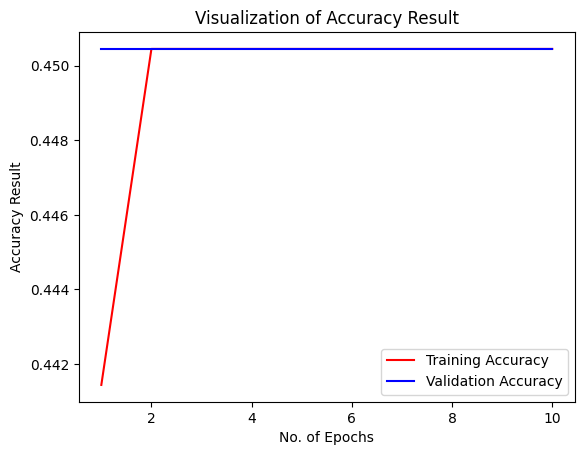

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names
class_name

['Bacterial', 'Fungal', 'Viral']

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Chat Bot/aicrop/Rice-diseases-Data-Set/Dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1027 files belonging to 3 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

33/33 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step


(array([[0.41544288, 0.36301452, 0.22154261],
        [0.41544288, 0.36301452, 0.22154261],
        [0.41544288, 0.36301452, 0.22154261],
        ...,
        [0.41544288, 0.36301452, 0.22154261],
        [0.41544288, 0.36301452, 0.22154261],
        [0.41544288, 0.36301452, 0.22154261]], dtype=float32),
 (1027, 3))

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(1027,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 0, 0])>

In [ ]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(1027, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(1027,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2])>

![image.png](attachment:f464cbcc-5d6b-4f32-835c-9aabe0f9c5d4.png)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

   Bacterial       0.24      1.00      0.39       250
      Fungal       0.00      0.00      0.00       727
       Viral       0.00      0.00      0.00        50

    accuracy                           0.24      1027
   macro avg       0.08      0.33      0.13      1027
weighted avg       0.06      0.24      0.10      1027



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[250,   0,   0],
       [727,   0,   0],
       [ 50,   0,   0]])

### Confusion Matrix Visualization

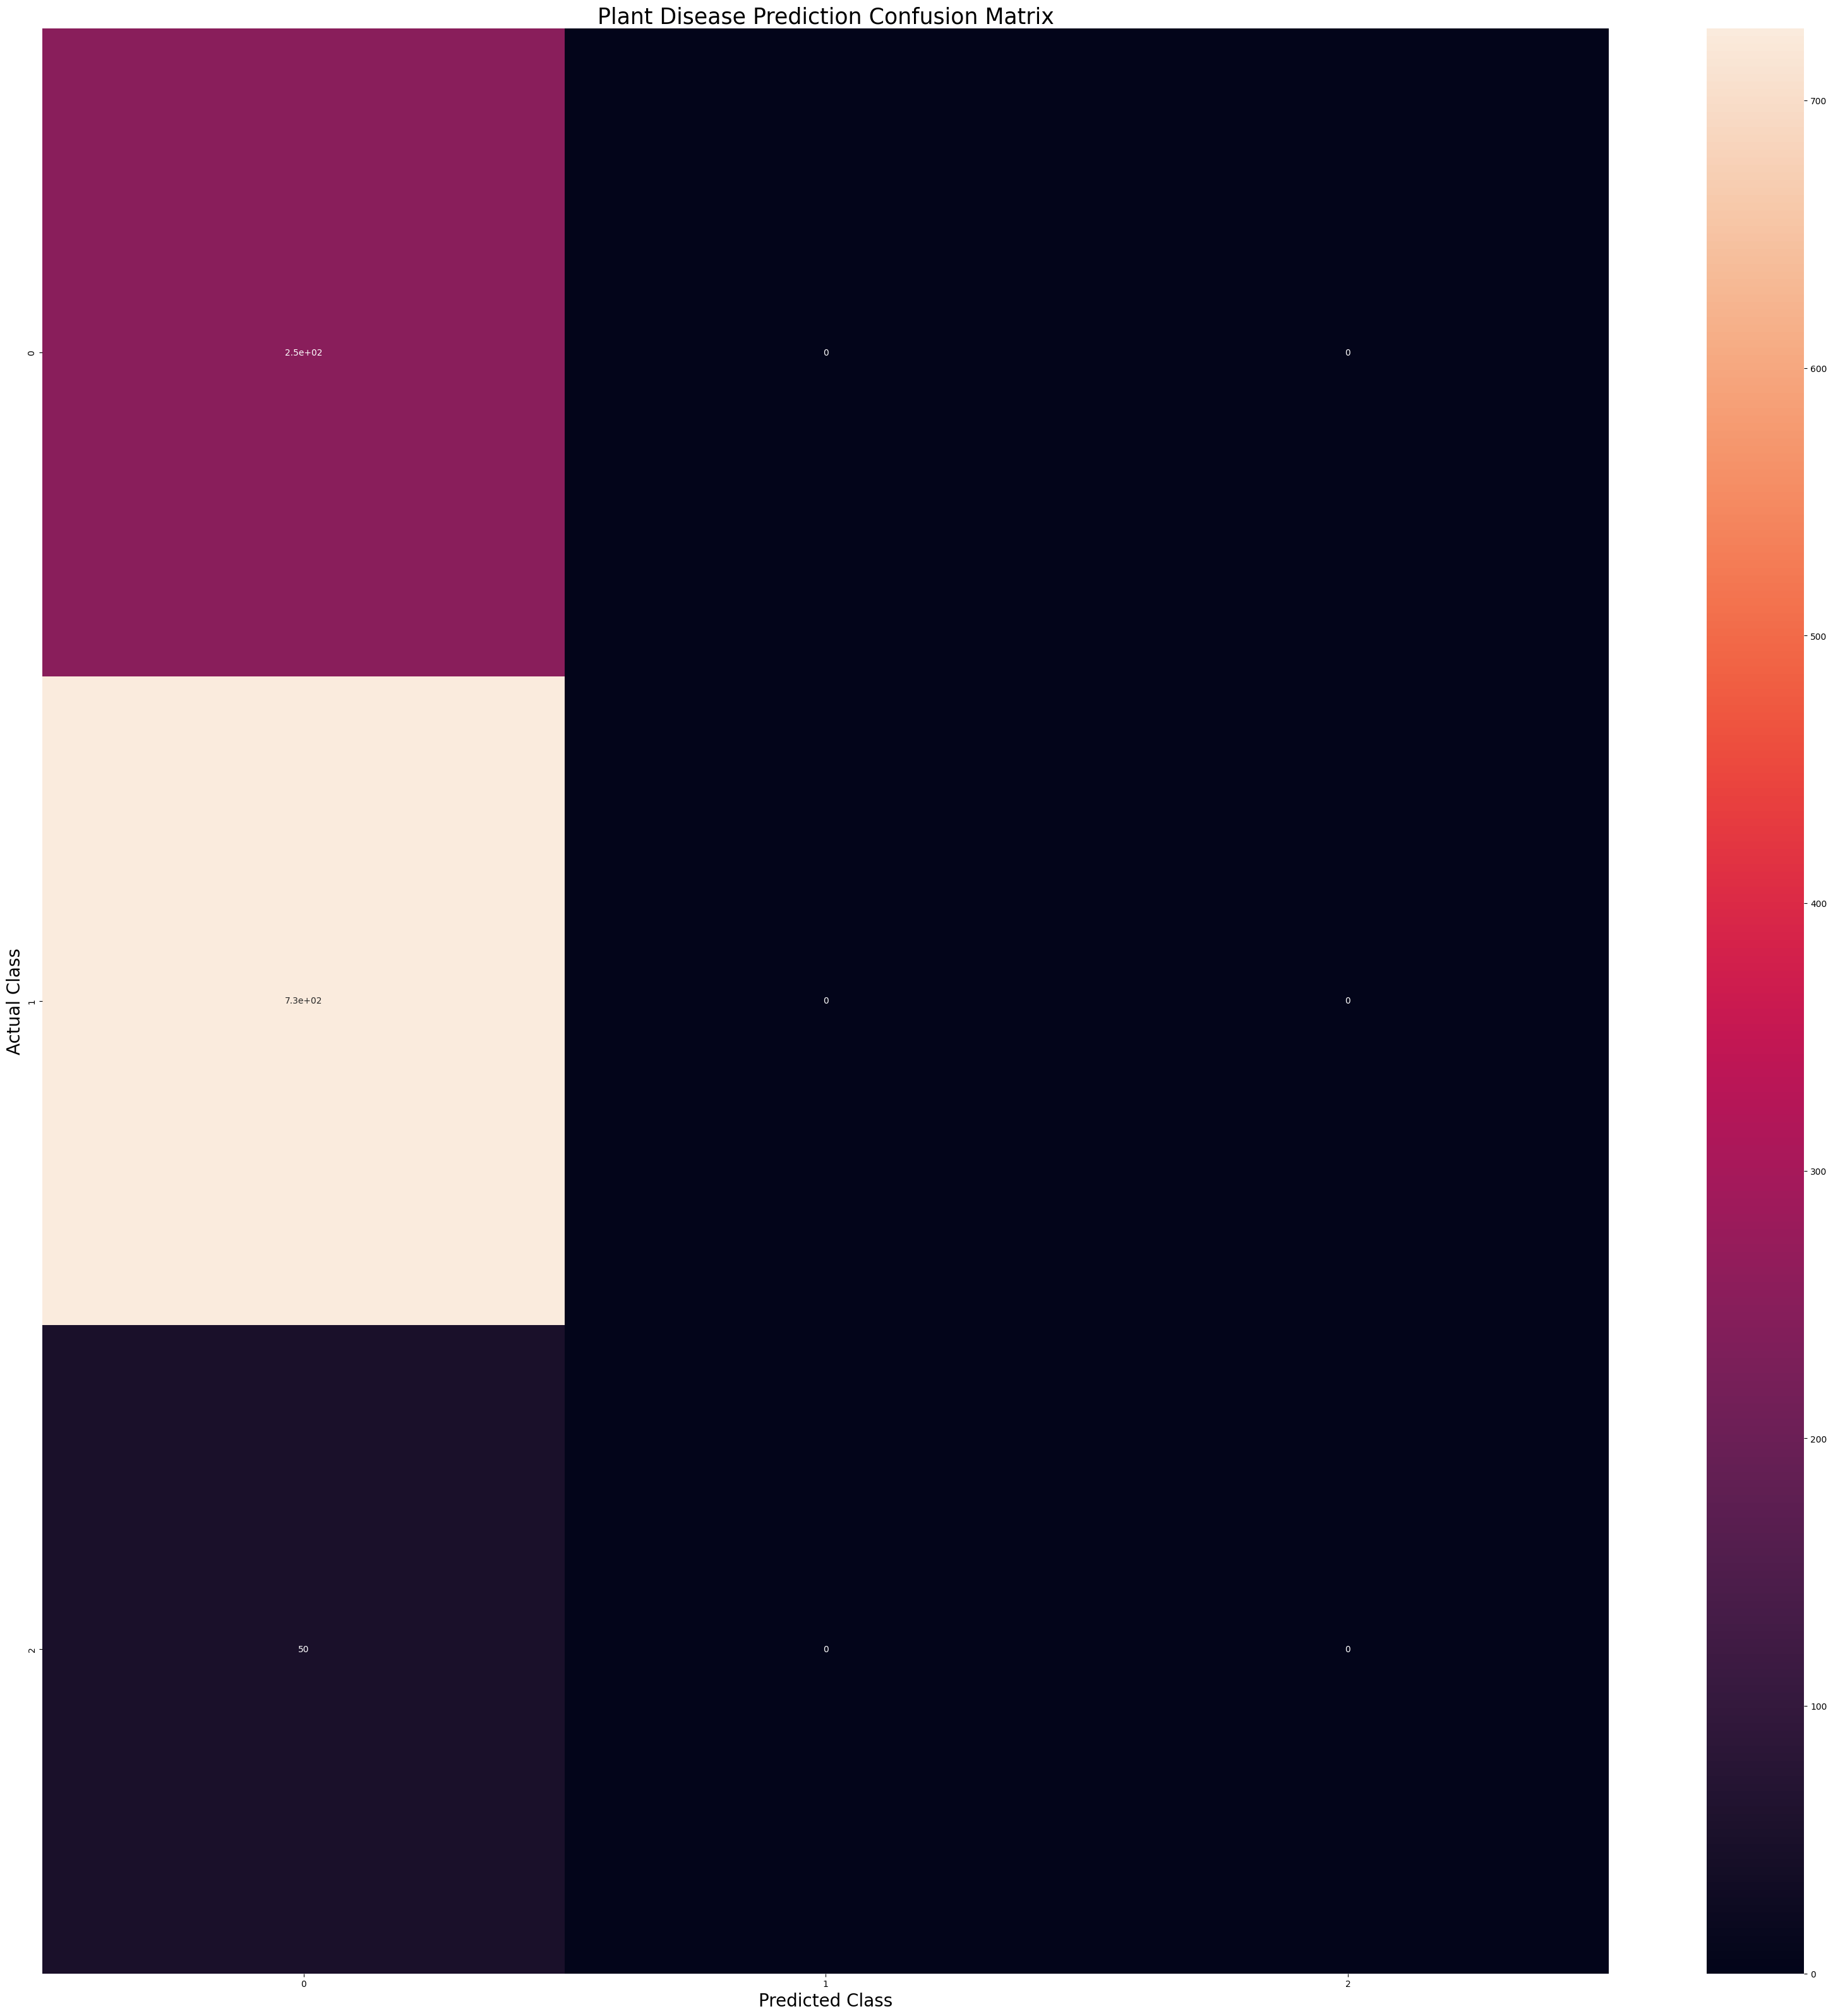

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()